# Clasificadores

## Comparacion

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

nombre -> (formato de linea, nombre del clasificador)

In [18]:
CLASS_MAP = {
    'Logistic Regression':('-', LogisticRegression()), 
    'Naive Bayes': ('--', GaussianNB()),
    'Decision Tree': ('.-', DecisionTreeClassifier(max_depth=5)),
    'Random Forest': (':', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))
}

In [19]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
X, Y = df[df.columns[:3]], (df['species']=='virginica')
Y

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=8)

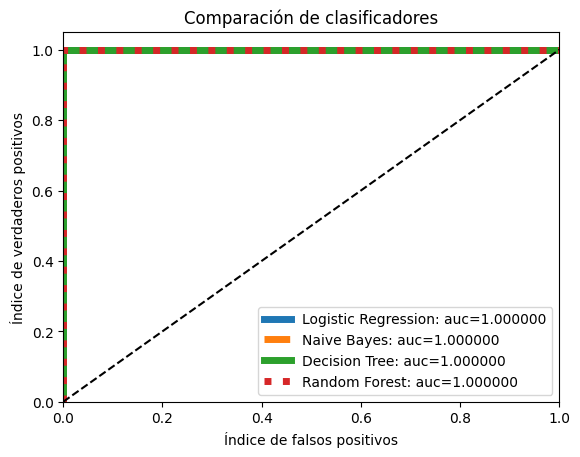

In [23]:
for nombre, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    preds = model.predict_proba(X_test)
    prediccion = pd.Series(preds[:,1])
    fpr, tpr, umbral = roc_curve(Y_test, prediccion) # tpr indice de verdaderos positivos, fpr indice de falsos positivos
    auc_score = auc(fpr, tpr)
    etiqueta = '%s: auc=%f' % (nombre, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth=5, label=etiqueta)
plt.legend(loc='lower right')
plt.title('Comparación de clasificadores')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Índice de falsos positivos')
plt.ylabel('Índice de verdaderos positivos')
plt.show()